In [53]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

import thinkbayes
from thinkbayes import Pmf
from thinkbayes import Suite
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# 추정 2

## 1. 유로 문제

- 동전 회전을 250번 시행
- 앞면이 140회, 뒷면이 110회 나옴
- LSE의 베리 브라이트 교수는 '동전이 기울지 않는 이상 결과가 이렇게 치우칠 확률은 7% 미만이다' 라고 언급
- **위 데이터로 동전이 기울었음을 증명할 수 있을까?**

> 1. 동전이 앞면이 나올 확률을 추정
> 2. 데이터가 동전이 기울었다는 가설에 부합하는지 확인

- 가설 $H_x$는 1에서 100까지 앞면이 나올 확률이 $x\%$임
- 동전을 던져서 무언가 나올 확률은 균등 사전분포에서 시작 (hypotheses = range(1,101))
- 우도함수는 다음과 같이 규정할 수 있음 $p(H) = x/100$, $p(T) = (100-x)/100$

In [28]:
class Euro(Suite):
    def Likelihood(self, data, hypo):
        x = hypo
        if data == 'H':
            return x/100
        else:
            return (100-x)/100

In [46]:
suite = Euro(range(0,101))
dataset = 'H'*140 + 'T'*110

for data in dataset:
    suite.Update(data)

suite.d

{0: 0.0,
 1: 1.2563304589679406e-207,
 2: 5.731921084330737e-166,
 3: 8.338710825995312e-142,
 4: 8.269264884325567e-125,
 5: 9.652274676137561e-112,
 6: 3.668355640015438e-101,
 7: 2.6673648652111617e-92,
 8: 1.067804311922848e-84,
 9: 4.653041866667465e-78,
 10: 3.5148639684269944e-72,
 11: 6.41370730237118e-67,
 12: 3.6116101639380365e-62,
 13: 7.558221138889982e-58,
 14: 6.791834819435185e-54,
 15: 2.938262414300847e-50,
 16: 6.710448103474771e-47,
 17: 8.723115797935806e-44,
 18: 6.869212634536842e-41,
 19: 3.452142332222388e-38,
 20: 1.1569922381844238e-35,
 21: 2.684811430039415e-33,
 22: 4.454655201037467e-31,
 23: 5.433870634035609e-29,
 24: 4.992309179721862e-27,
 25: 3.5283582174022986e-25,
 26: 1.954296119578907e-23,
 27: 8.623311588848912e-22,
 28: 3.0756115185781603e-20,
 29: 8.981948245990872e-19,
 30: 2.1726638865771484e-17,
 31: 4.3981455873488677e-16,
 32: 7.519861568782927e-15,
 33: 1.0949955730436074e-13,
 34: 1.3680871977846058e-12,
 35: 1.476481205621615e-11,
 36:

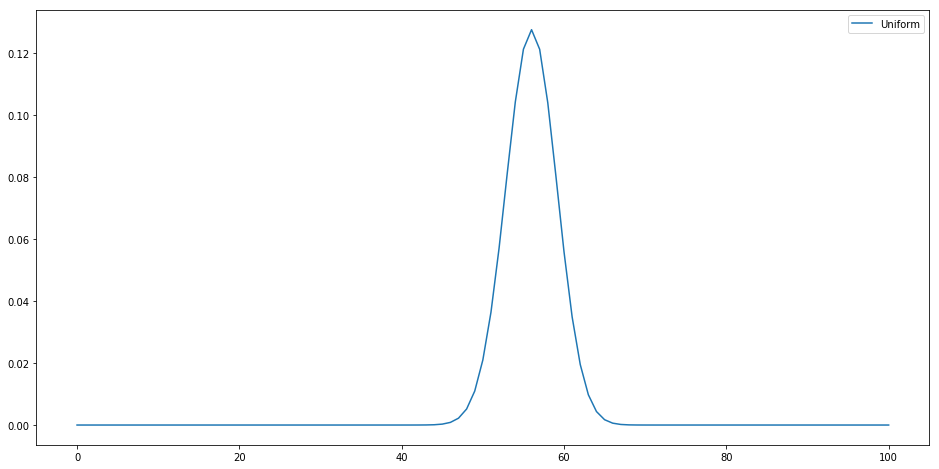

In [47]:
pd.Series(suite.d, index = suite.d.keys()).plot(label = 'Uniform')
plt.legend()

## 2. 사후 확률 요약하기

- 위 사후확률 분포를 요약하는 방법에는 여러 가지가 있음
- 한 가지 방법으로는 사후 확률 분포에 가장 근접한 값을 찾는 것이고, 최대 우도 추정값이 될 수 있음
- thinkbayes에서는 아래와 같이 최대 우도 추정 가능

~~~python
    def MaximumLikelihood(self):
        """Returns the value with the highest probability.
        Returns: float probability
        """
        prob, val = max((prob, val) for val, prob in self.Items())
        return val
~~~

In [48]:
suite.MaximumLikelihood()

56

- 혹은 아래와 같이 평균, 또는 중간값으로 요약 가능

In [50]:
suite.Mean()

55.95238095238094

In [54]:
thinkbayes.Percentile(suite, 50)

56

- 마지막으로 신뢰구간으로 요약도 가능

In [55]:
thinkbayes.CredibleInterval(suite, 90)

(51, 61)

>- 위 결과로 추론하건대, 90% 신뢰구간에서 동전이 평평하다고($H_x = 50\%$) 주장 할 수 없음
>- 다만, 이는 **"데이터로 동전이 기울었음을 증명할 수 있을까?"라는 원 질문과는 다름**
>- 이 질문에 대답하기 위해서는 <U>**데이터가 가설에 대해 증거를 갖추고 있다는 것이 어떤 의미인지**</U> 확인 필요

## 3. 사전 분포 범람

- 만약 동전이 한쪽으로 치우쳐 있다면 **사전확률이 균등분포를 따른다고 보기는 어려움**
- 50%에 가까운 $x$에 더 높은 확률을 부여하고 극단 값에 낮은 확률을 부여하는 삼각 사전확률을 대안으로 점검

In [56]:
def TrianglePrior():
    suite = Euro()
    for x in range(0, 51):
        suite.Set(x,x)
    for x in range(51, 101):
        suite.Set(x, 100-x)
    suite.Normalize()

In [ ]:
suite = Euro(range(0,101))

suite_tr = Euro()
for x in range(0, 51):
    suite_tr.Set(x,x)
for x in range(51, 101):
    suite_tr.Set(x, 100-x)
suite_tr.Normalize()

prep_dist = pd.DataFrame({'range': range(0,101), 'uniform': [i for i in suite.d.values()], 'triangle': [i for i in suite_tr.d.values()]})

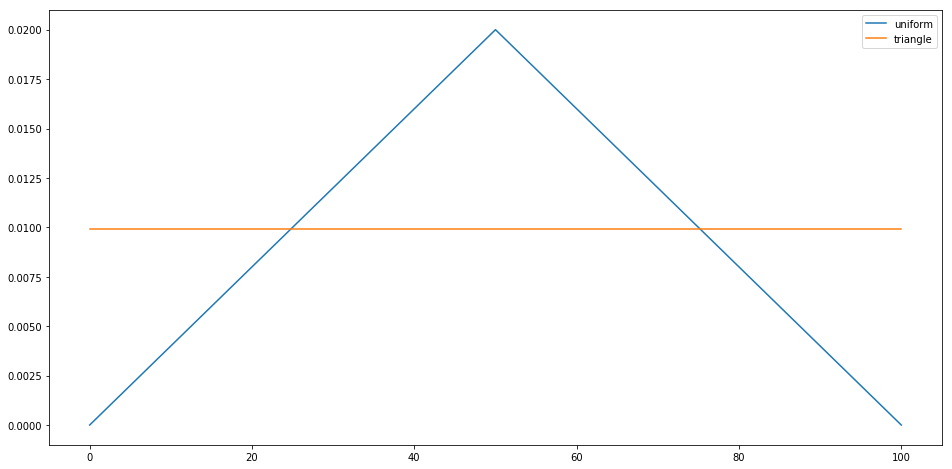

In [97]:
plot(prep_dist.iloc[:,1], label = 'uniform')
plot(prep_dist.iloc[:,2], label = 'triangle')
plt.legend()